In [ ]:
pip install numpy

In [ ]:
!python ‐‐version

python3: can't open file '/content/‐‐version': [Errno 2] No such file or directory


In [ ]:
!python ‐‐version

python3: can't open file '/content/‐‐version': [Errno 2] No such file or directory


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
pip install matplotlib


In [ ]:
pip install pandas-datareader

In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import tensorflow


from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import yfinance


In [ ]:


company = 'XAUT-USD'

start = dt.datetime(2012,1,1)
end = dt.datetime(2023,12,30)

data = yfinance.download(company, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


In [ ]:

prediction_days = 5

x_train = []
y_train = []


for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)


Epoch 1/25
45/45 [==============================] - 11s 48ms/step - loss: 0.1244
Epoch 2/25
45/45 [==============================] - 1s 33ms/step - loss: 0.0239
Epoch 3/25
45/45 [==============================] - 2s 34ms/step - loss: 0.0141
Epoch 4/25
45/45 [==============================] - 1s 33ms/step - loss: 0.0110
Epoch 5/25
45/45 [==============================] - 2s 35ms/step - loss: 0.0103
Epoch 6/25
45/45 [==============================] - 1s 31ms/step - loss: 0.0095
Epoch 7/25
45/45 [==============================] - 1s 30ms/step - loss: 0.0095
Epoch 8/25
45/45 [==============================] - 2s 50ms/step - loss: 0.0092
Epoch 9/25
45/45 [==============================] - 2s 48ms/step - loss: 0.0084
Epoch 10/25
45/45 [==============================] - 1s 33ms/step - loss: 0.0080
Epoch 11/25
45/45 [==============================] - 2s 34ms/step - loss: 0.0083
Epoch 12/25
45/45 [==============================] - 1s 33ms/step - loss: 0.0083
Epoch 13/25
45/45 [=================

In [ ]:



test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yfinance.download(company, test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


[*********************100%%**********************]  1 of 1 completed


In [ ]:


x_test = []

for x in range(prediction_days, len(model_inputs)+1):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

45/45 [==============================] - 1s 5ms/step


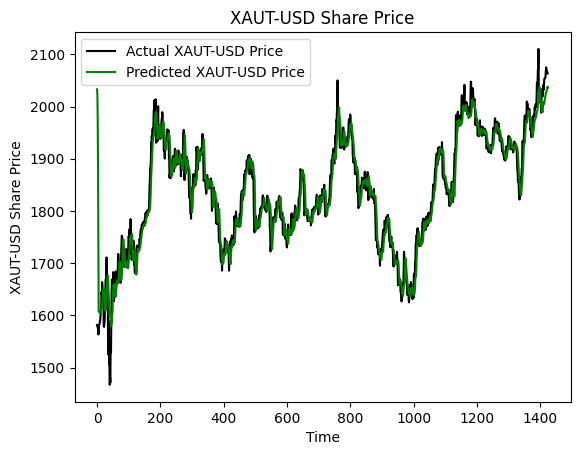

In [ ]:

plt.plot(actual_prices, color="black" , label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:


real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))


prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 466ms/step
Prediction: [[1867.8518]]
